<a href="https://colab.research.google.com/github/SabeehMehtab/ML_Classification/blob/main/Dry_Bean_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#All Imports

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
import tensorflow as tf

#Access Dry Bean dataset directly from the UCI new Beta website. 
##Here is the link: https://archive.ics.uci.edu/ml/machine-learning-databases/00602

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip

--2023-04-14 18:09:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4738776 (4.5M) [application/x-httpd-php]
Saving to: ‘DryBeanDataset.zip’

DryBeanDataset.zip  100%[===================>]   4.52M  8.51MB/s    in 0.5s    

2023-04-14 18:09:45 (8.51 MB/s) - ‘DryBeanDataset.zip’ saved [4738776/4738776]



In [ ]:
!unzip /content/DryBeanDataset.zip

Archive:  /content/DryBeanDataset.zip
   creating: DryBeanDataset/
  inflating: DryBeanDataset/Dry_Bean_Dataset.arff  
  inflating: DryBeanDataset/Dry_Bean_Dataset.txt  
  inflating: DryBeanDataset/Dry_Bean_Dataset.xlsx  


In [ ]:
df = pd.read_excel("/content/DryBeanDataset/Dry_Bean_Dataset.xlsx")

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

# Data Visualization

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='Count'>

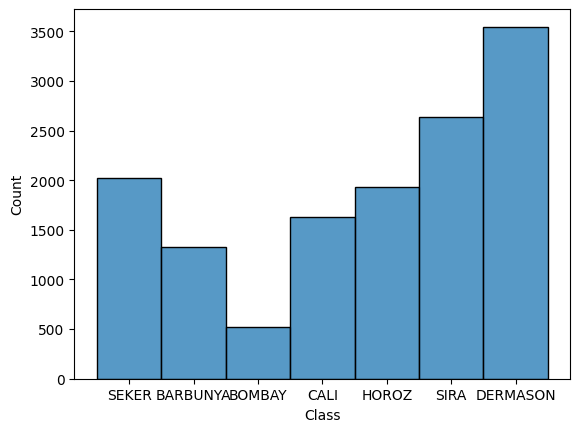

In [ ]:
print(df['Class'].value_counts())
sns.histplot(data=df, x="Class", stat="count", discrete=True)

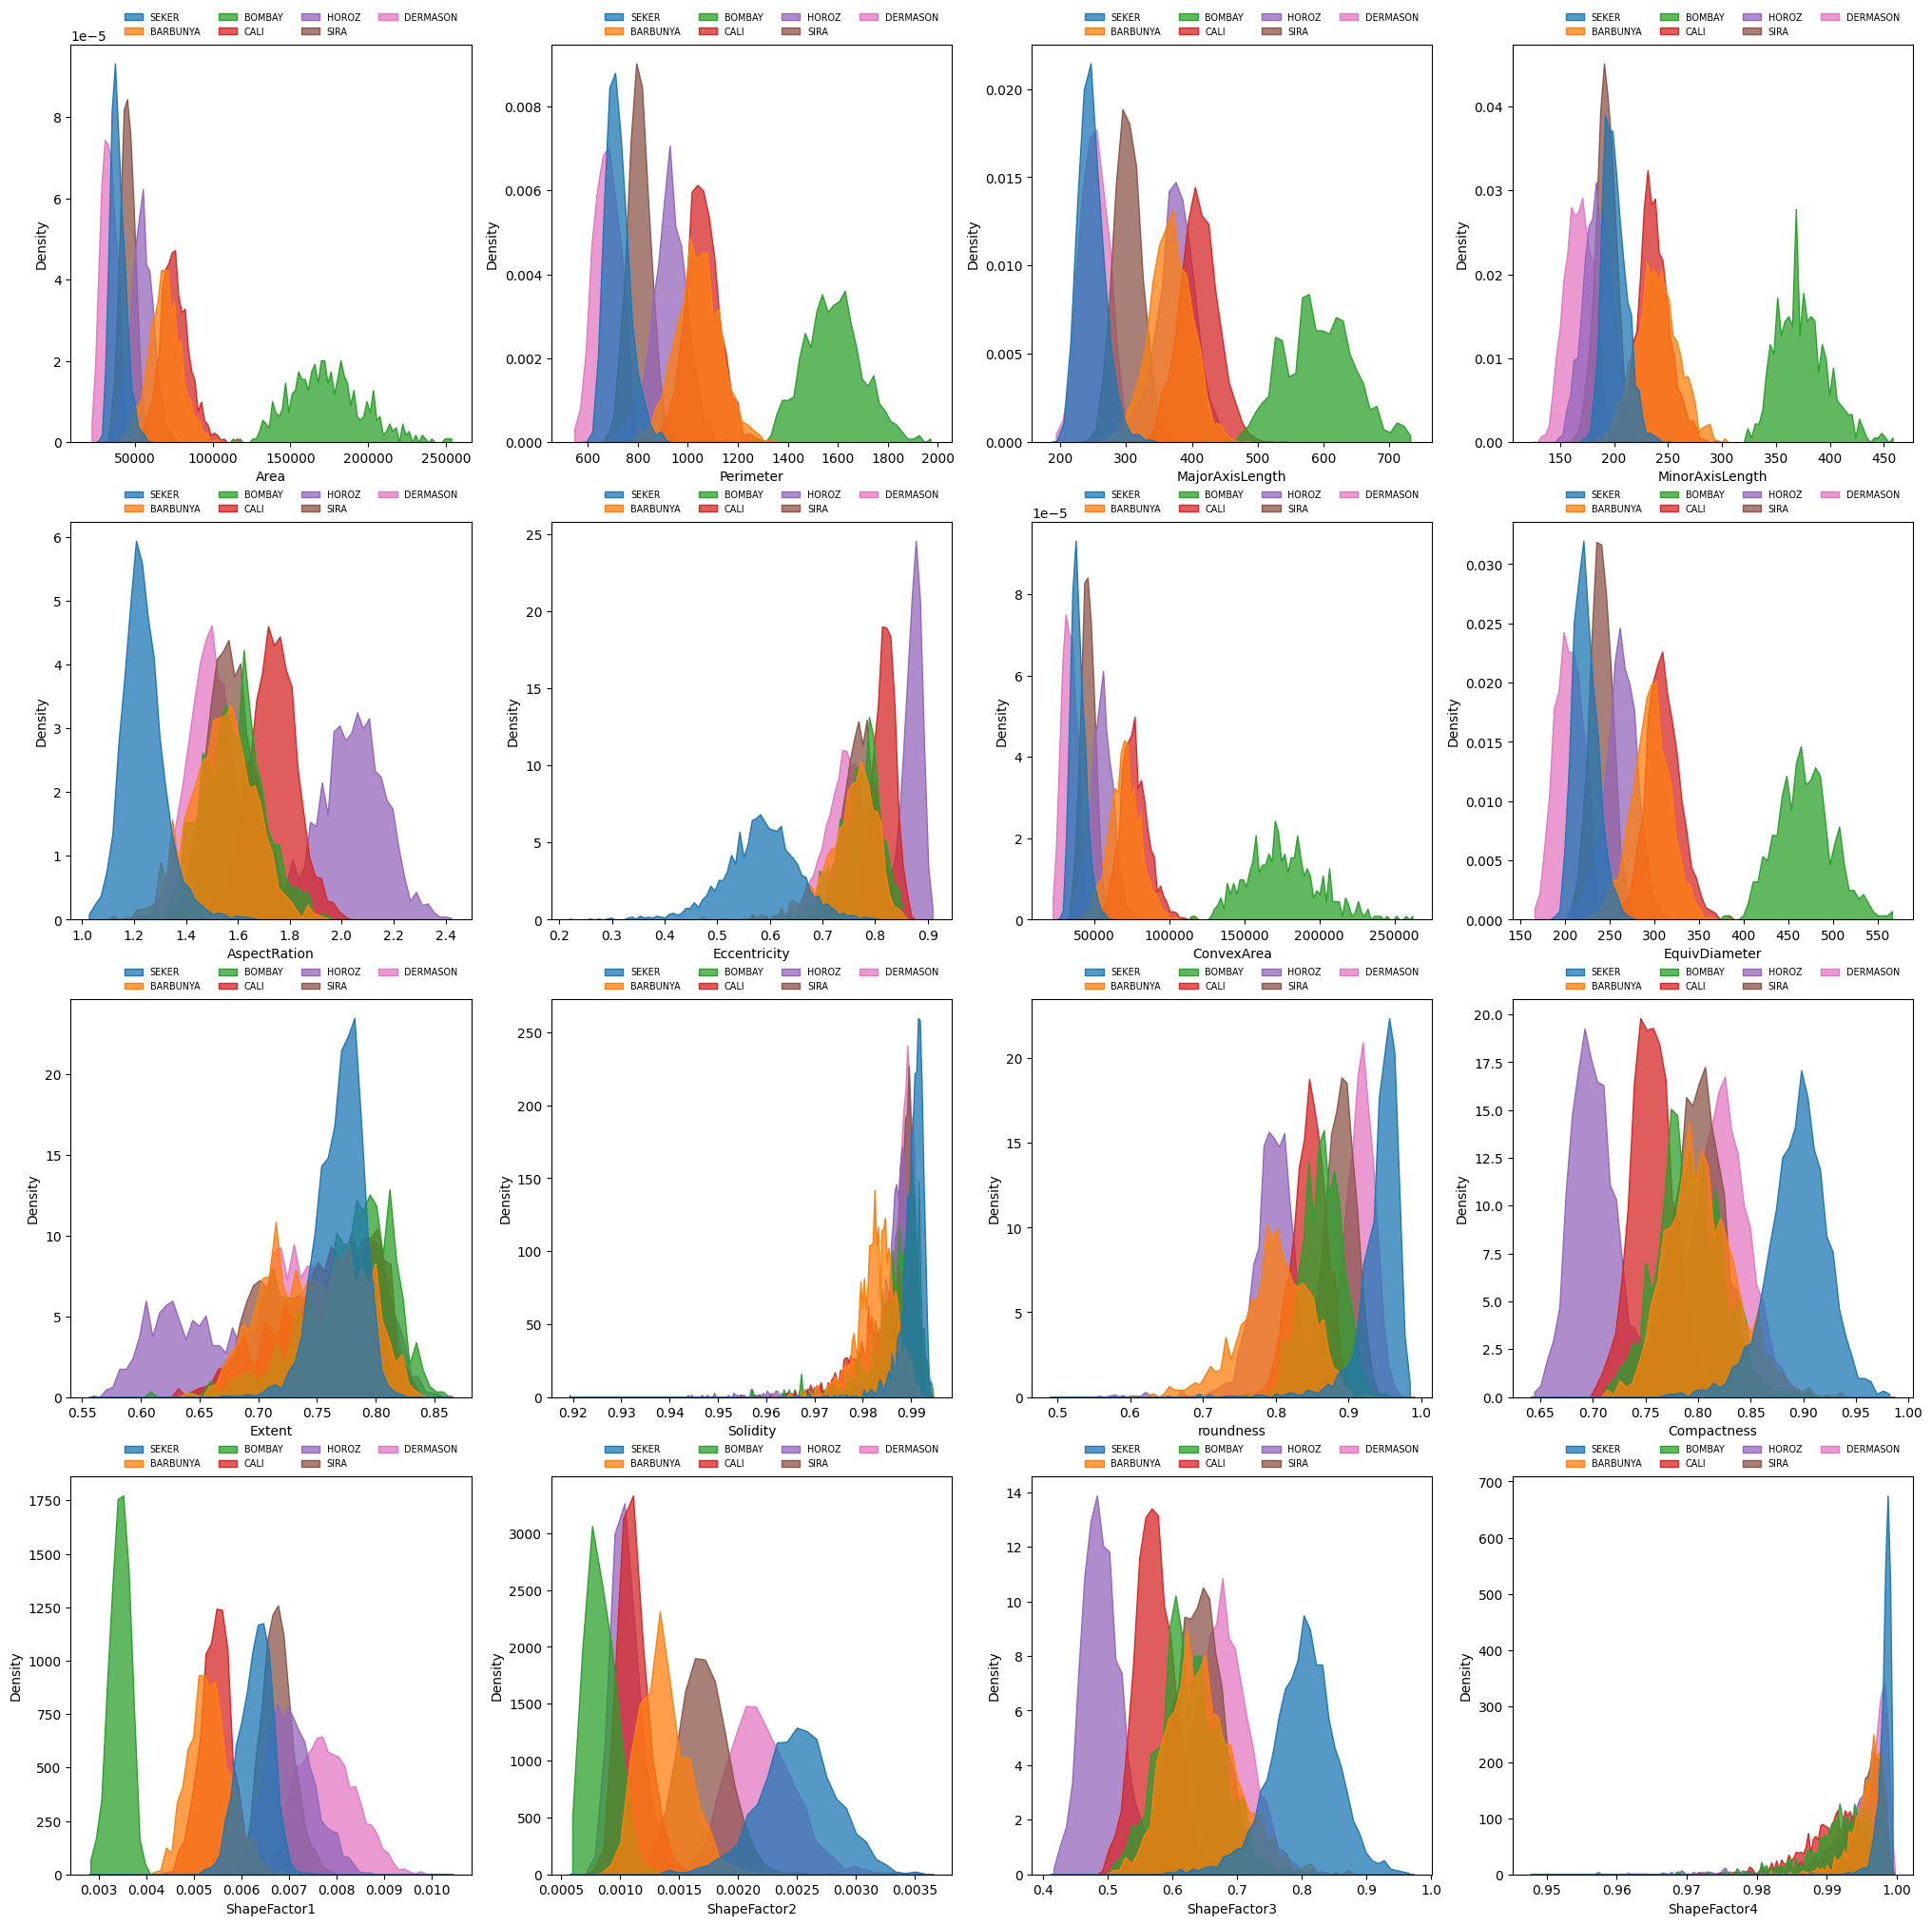

In [ ]:
fig, axes =  plt.subplots(4, 4, figsize=(25,25))
figrow = 0
for figcol, feature in enumerate(df.columns[:-1]):
  figcol=figcol%4
  ax = sns.histplot(
      data=df[[feature,'Class']], x=feature, hue="Class", legend=True, stat="density",
      multiple="dodge", element="poly", common_norm=False, ax=axes[figrow,figcol])
  sns.move_legend(ax, "lower center", bbox_to_anchor=(.55, 1), ncol=4, title=None, frameon=False, fontsize='x-small')
  if(figcol==3):
    figrow+=1

# Preprocessing 
###Feature Selection

Feature 1: 29017.510462 (Area)
Feature 2: 24283.663708 (Perimeter)
Feature 3: 21622.237936 (MajorAxisLength)
Feature 4: 22442.386382 (MinorAxisLength)
Feature 5: 10376.979153 (AspectRation)
Feature 6: 8276.744014 (Eccentricity)
Feature 7: 28961.791217 (ConvexArea)
Feature 8: 25444.547794 (EquivDiameter)
Feature 9: 422.302320 (Extent)
Feature 10: 631.724471 (Solidity)
Feature 11: 6156.430313 (roundness)
Feature 12: 10166.117904 (Compactness)
Feature 13: 12081.321127 (ShapeFactor1)
Feature 14: 12329.883853 (ShapeFactor2)
Feature 15: 9900.437839 (ShapeFactor3)
Feature 16: 1255.105300 (ShapeFactor4)



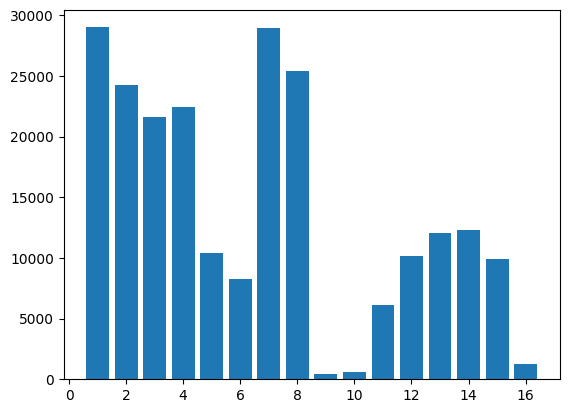

In [ ]:
X = df.iloc[:,:-1]
y = df["Class"]

# configuration for 10 best feature
feature_selection = SelectKBest(score_func=f_classif, k=10)
# learn relationship from data
feature_selection.fit(X, y)

# print scores given to each feature
for i in range(len(feature_selection.scores_)):
 print('Feature %d: %f (%s)' % (i+1, feature_selection.scores_[i], df.columns[i]))
print()

# plot the scores for a quick view
plt.bar([i for i in range(1,len(feature_selection.scores_)+1)], feature_selection.scores_)
plt.show()

In [ ]:
# Name of top 10 features
ten_features = feature_selection.get_feature_names_out()
print("Top 10 Feature Names:")
print(ten_features)

pd.options.mode.chained_assignment = None
# create new datafram with these 10 features
df_ten = df[np.append(ten_features, "Class")]
df_ten.head()

Top 10 Feature Names:
['Area' 'Perimeter' 'MajorAxisLength' 'MinorAxisLength' 'AspectRation'
 'ConvexArea' 'EquivDiameter' 'Compactness' 'ShapeFactor1' 'ShapeFactor2']


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,ConvexArea,EquivDiameter,Compactness,ShapeFactor1,ShapeFactor2,Class
0,28395,610.291,208.178117,173.888747,1.197191,28715,190.141097,0.913358,0.007332,0.003147,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,29172,191.272750,0.953861,0.006979,0.003564,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,29690,193.410904,0.908774,0.007244,0.003048,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,30724,195.467062,0.928329,0.007017,0.003215,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,30417,195.896503,0.970516,0.006697,0.003665,SEKER


###Encode bean labels 

In [ ]:
le = LabelEncoder()
new_labels = le.fit_transform(df['Class'])
df_ten.drop("Class", axis=1, inplace=True)
df_ten['Class'] = new_labels
df_ten.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,ConvexArea,EquivDiameter,Compactness,ShapeFactor1,ShapeFactor2,Class
0,28395,610.291,208.178117,173.888747,1.197191,28715,190.141097,0.913358,0.007332,0.003147,5
1,28734,638.018,200.524796,182.734419,1.097356,29172,191.272750,0.953861,0.006979,0.003564,5
2,29380,624.110,212.826130,175.931143,1.209713,29690,193.410904,0.908774,0.007244,0.003048,5
3,30008,645.884,210.557999,182.516516,1.153638,30724,195.467062,0.928329,0.007017,0.003215,5
4,30140,620.134,201.847882,190.279279,1.060798,30417,195.896503,0.970516,0.006697,0.003665,5


In [ ]:
# Mapping of transformed labels
print(le.inverse_transform([0,1,2,3,4,5,6]))

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


###Train & Test Sets (70:30)

In [ ]:
train, test = np.split(df_ten.sample(frac=1), [int(0.7*len(df_ten))])
x_train = train.iloc[:,:-1]
y_train = train["Class"]
x_test = test.iloc[:,:-1]
y_test = test["Class"]
y_test = le.inverse_transform(y_test)

###Apply Scaling

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rfc.predict(x_test)
y_pred = le.inverse_transform(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.87      0.85      0.86       396
      BOMBAY       0.99      1.00      1.00       159
        CALI       0.90      0.88      0.89       504
    DERMASON       0.90      0.93      0.91      1040
       HOROZ       0.95      0.94      0.94       619
       SEKER       0.94      0.94      0.94       568
        SIRA       0.86      0.84      0.85       798

    accuracy                           0.90      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084



#kNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(x_test)
y_pred = le.inverse_transform(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.87      0.84      0.86       396
      BOMBAY       0.99      1.00      1.00       159
        CALI       0.90      0.89      0.89       504
    DERMASON       0.89      0.93      0.91      1040
       HOROZ       0.96      0.94      0.95       619
       SEKER       0.94      0.93      0.94       568
        SIRA       0.85      0.84      0.85       798

    accuracy                           0.90      4084
   macro avg       0.92      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084



#Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
y_pred = le.inverse_transform(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.77      0.72      0.75       396
      BOMBAY       0.99      1.00      0.99       159
        CALI       0.81      0.84      0.83       504
    DERMASON       0.92      0.89      0.90      1040
       HOROZ       0.93      0.93      0.93       619
       SEKER       0.93      0.94      0.93       568
        SIRA       0.82      0.87      0.84       798

    accuracy                           0.88      4084
   macro avg       0.88      0.88      0.88      4084
weighted avg       0.88      0.88      0.88      4084



#Support Vector Machines

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
y_pred = le.inverse_transform(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.91      0.81      0.86       396
      BOMBAY       0.99      1.00      1.00       159
        CALI       0.88      0.91      0.90       504
    DERMASON       0.90      0.91      0.91      1040
       HOROZ       0.96      0.93      0.95       619
       SEKER       0.94      0.94      0.94       568
        SIRA       0.83      0.86      0.85       798

    accuracy                           0.90      4084
   macro avg       0.92      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084



#Neural Networks

###Train, Validation & Test Datasets (80:10:10)

In [ ]:
train, val, test = np.split(df_ten.sample(frac=1), [int(0.8*len(df_ten)), int(0.9*len(df_ten))])
x_train = train.iloc[:,:-1]
y_train = train["Class"]
x_val = val.iloc[:,:-1]
y_val = val["Class"]
x_test = test.iloc[:,:-1]
y_test = test["Class"]

###One-Hot Encoded Labels

In [ ]:
nn_y_train = le.inverse_transform(y_train)
nn_y_val = le.inverse_transform(y_val)
nn_y_test = le.inverse_transform(y_test)

nn_y_train = pd.get_dummies(nn_y_train)
nn_y_val = pd.get_dummies(nn_y_val)
nn_y_test = pd.get_dummies(nn_y_test)

nn_y_train

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
10883,1,0,0,0,0,0,0
10884,0,0,0,0,0,0,1
10885,0,0,0,1,0,0,0
10886,0,0,0,0,0,1,0


###Scaling

In [ ]:
yscaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

###Grid Search

In [ ]:
# Function for plotting loss and accuracy while training each model
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], "-b")
  ax1.plot(history.history['val_loss'], "--r")
  ax.legend(['loss','val_loss'], loc='best')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Categorical Crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['categorical_accuracy'], "-b")
  ax2.plot(history.history['val_categorical_accuracy'], "--r")
  ax.legend(['accuracy','val_accuracy'], loc='best')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
# Function to train model with different hyper-parameters to find the best one
def train_model(X_train, y_train, val_data, num_nodes1: int, num_nodes2: int, 
                lr: float, batch_size: int, epochs: int=100):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes1, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dense(num_nodes2, activation='relu'),
      tf.keras.layers.Dense(7, activation='softmax')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
                   loss='categorical_crossentropy',
                   metrics=['categorical_accuracy'])
  
  history = nn_model.fit(X_train, y_train,
                         epochs=epochs, batch_size=batch_size,
                         validation_data=val_data, verbose=0)

  return nn_model, history

num_nodes1 16, num_nodes2 16, lr 0.01, batch size 32


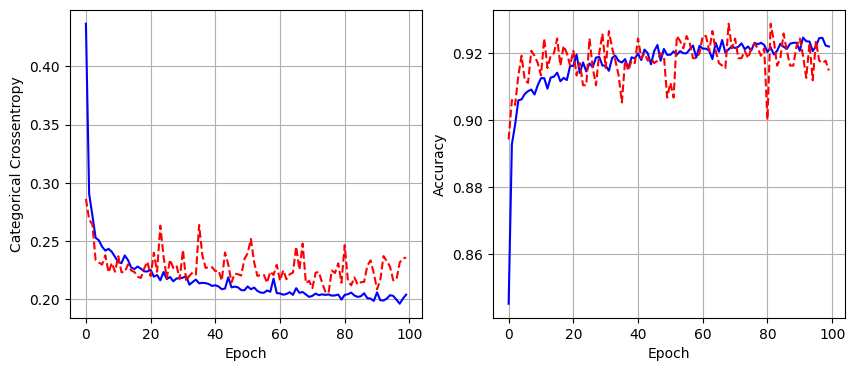


num_nodes1 16, num_nodes2 16, lr 0.01, batch size 64


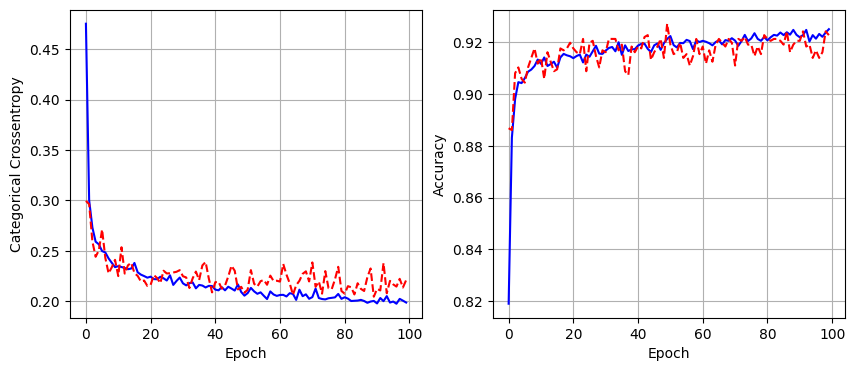


num_nodes1 16, num_nodes2 16, lr 0.01, batch size 128


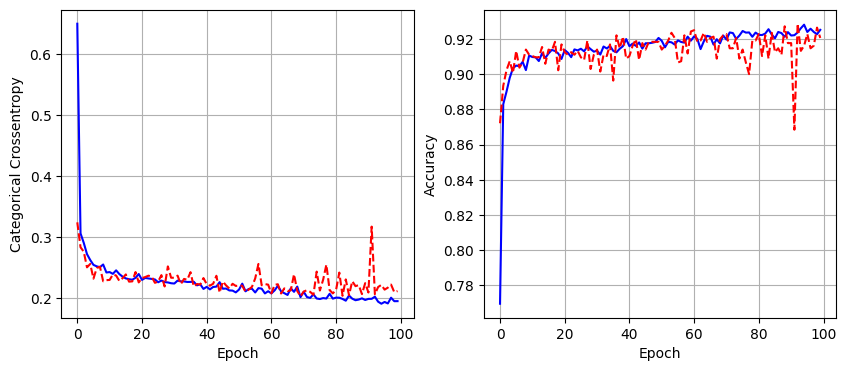


num_nodes1 16, num_nodes2 16, lr 0.005, batch size 32


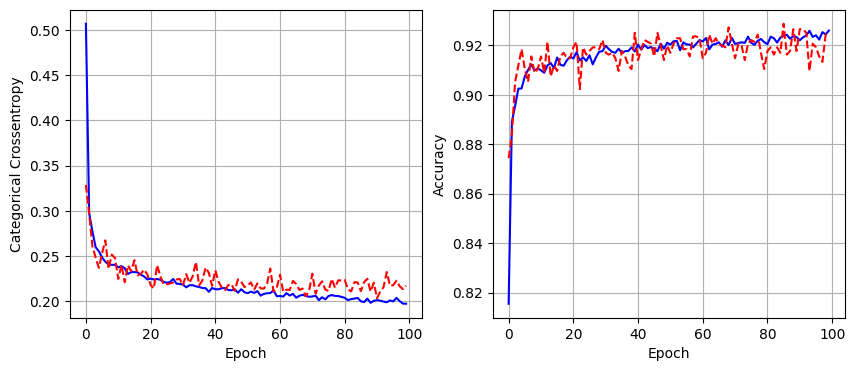


num_nodes1 16, num_nodes2 16, lr 0.005, batch size 64


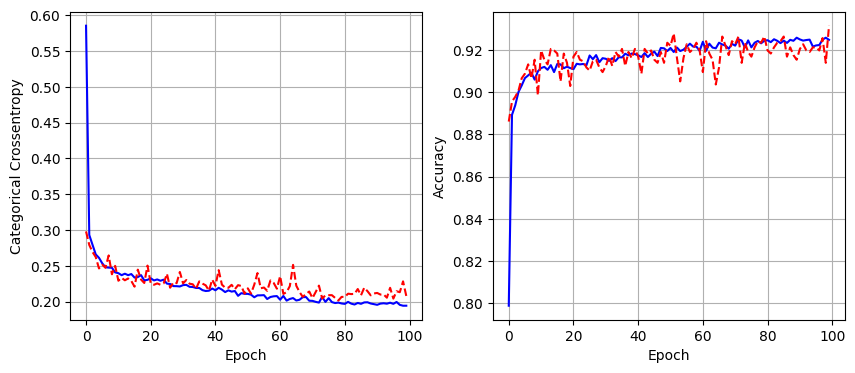


num_nodes1 16, num_nodes2 16, lr 0.005, batch size 128


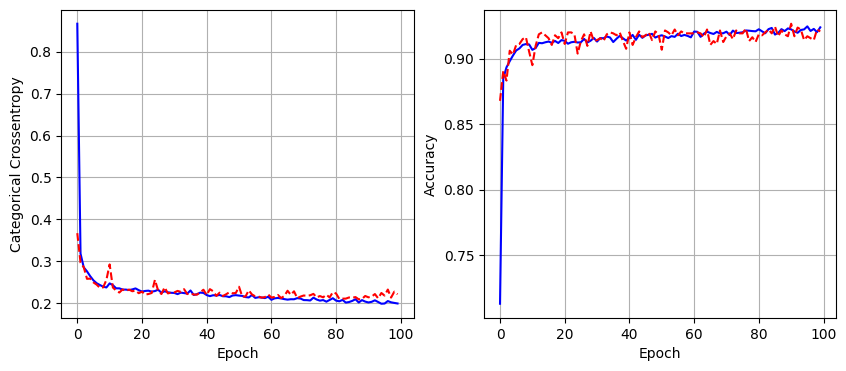


num_nodes1 16, num_nodes2 16, lr 0.001, batch size 32


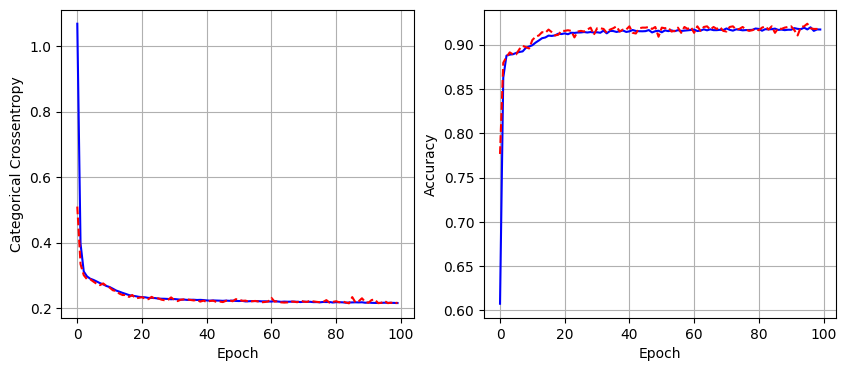


num_nodes1 16, num_nodes2 16, lr 0.001, batch size 64


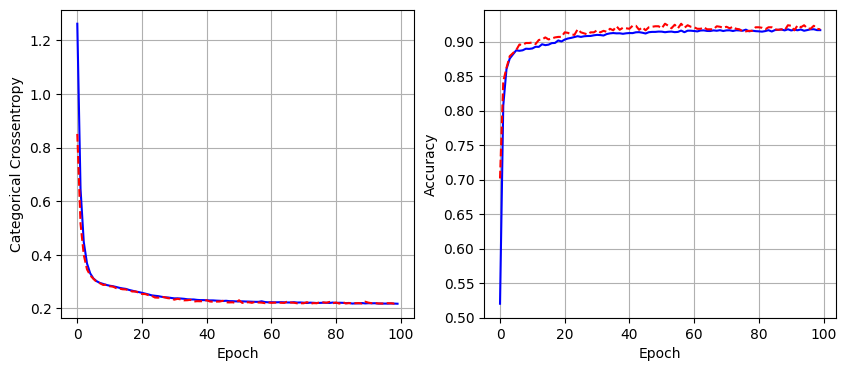


num_nodes1 16, num_nodes2 16, lr 0.001, batch size 128


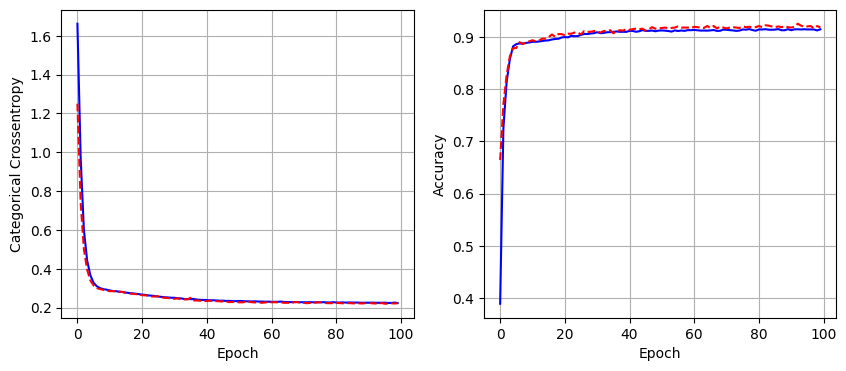


num_nodes1 16, num_nodes2 32, lr 0.01, batch size 32


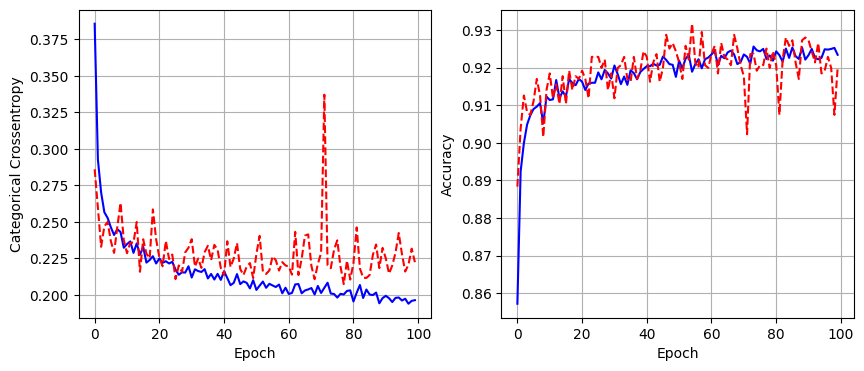


num_nodes1 16, num_nodes2 32, lr 0.01, batch size 64


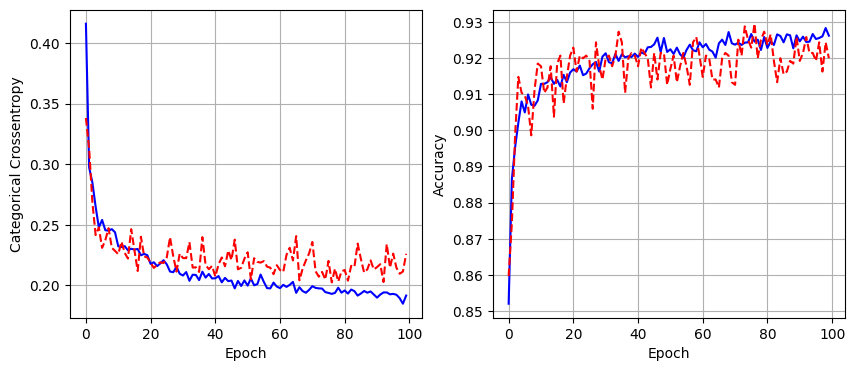


num_nodes1 16, num_nodes2 32, lr 0.01, batch size 128


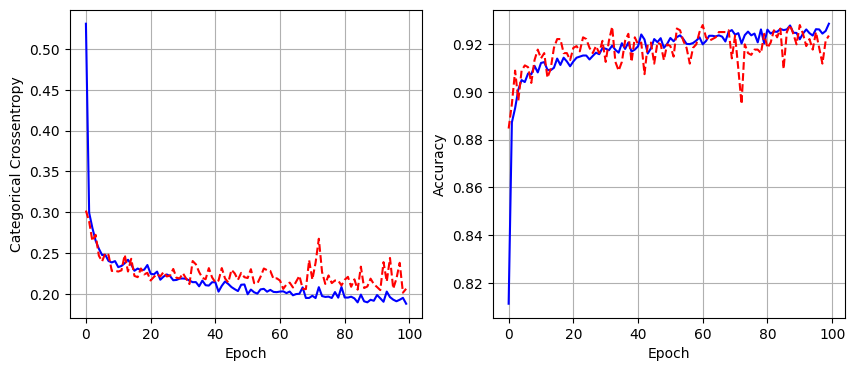


num_nodes1 16, num_nodes2 32, lr 0.005, batch size 32


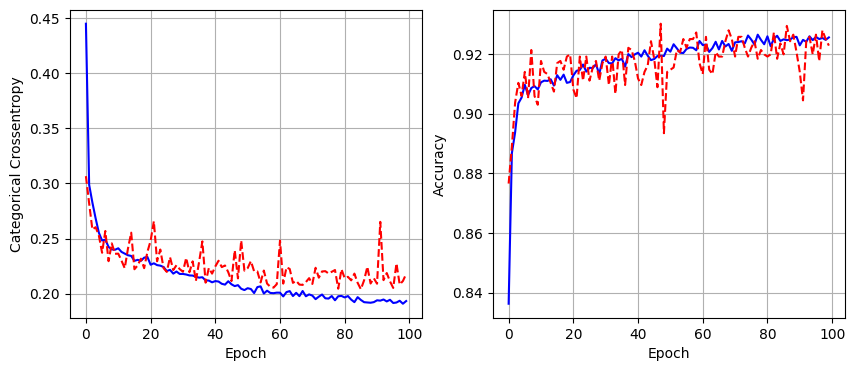


num_nodes1 16, num_nodes2 32, lr 0.005, batch size 64


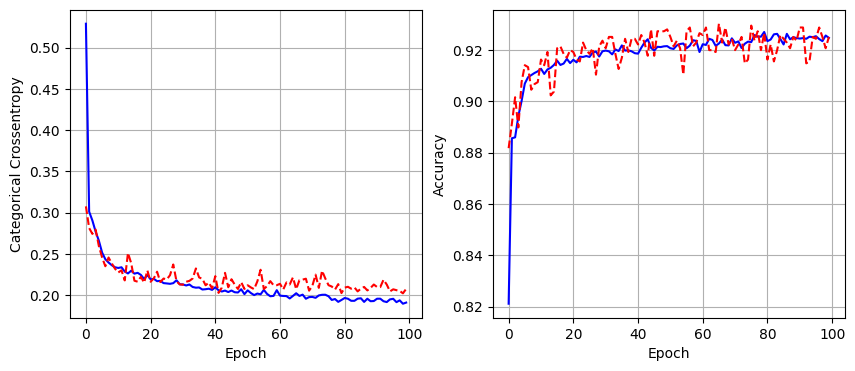


num_nodes1 16, num_nodes2 32, lr 0.005, batch size 128


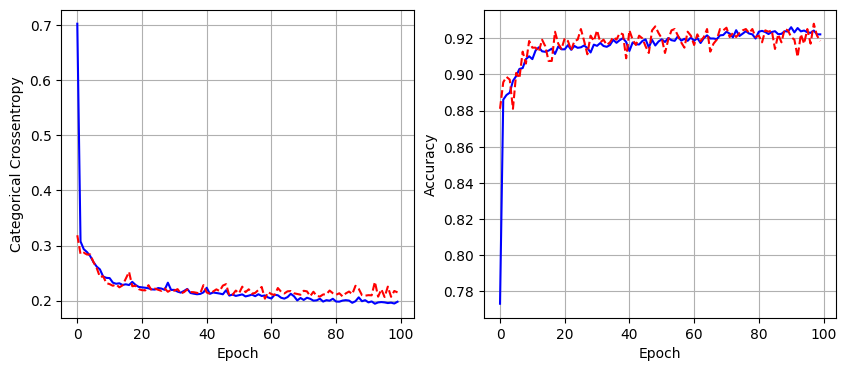


num_nodes1 16, num_nodes2 32, lr 0.001, batch size 32


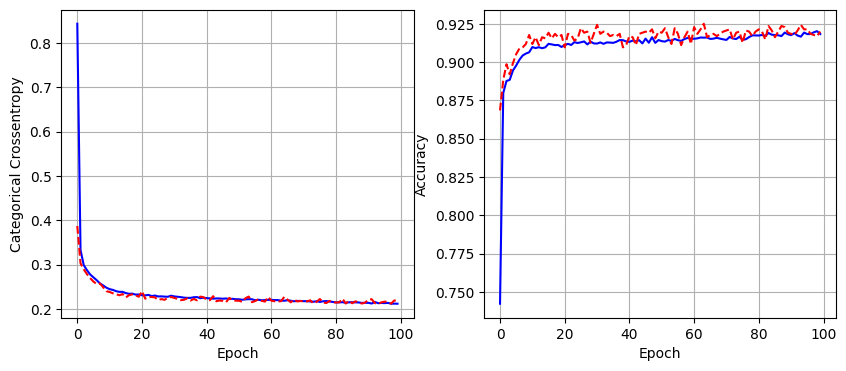


num_nodes1 16, num_nodes2 32, lr 0.001, batch size 64


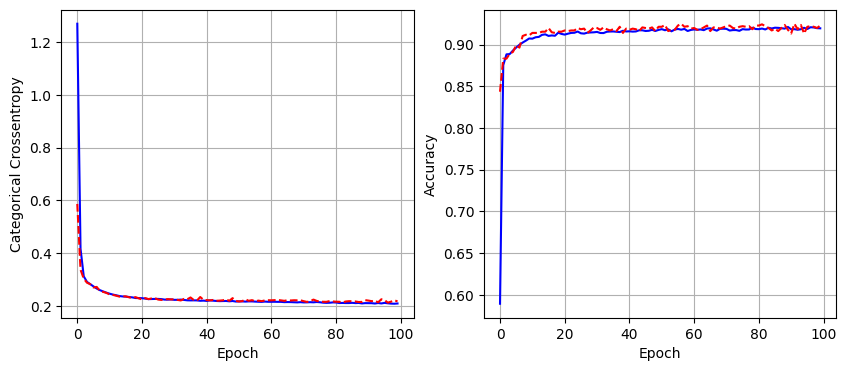


num_nodes1 16, num_nodes2 32, lr 0.001, batch size 128


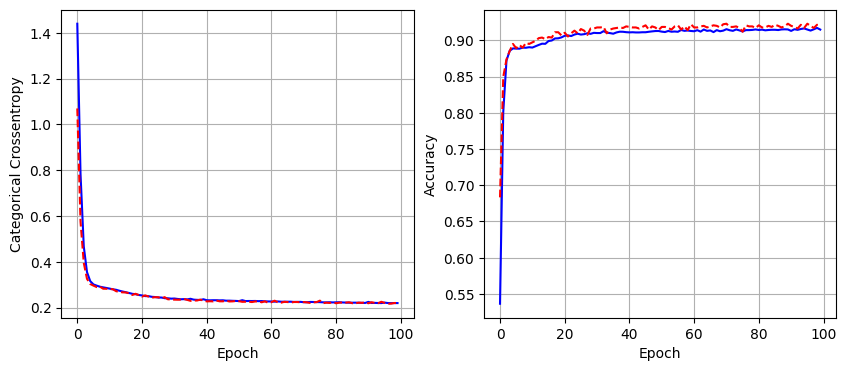


num_nodes1 32, num_nodes2 16, lr 0.01, batch size 32


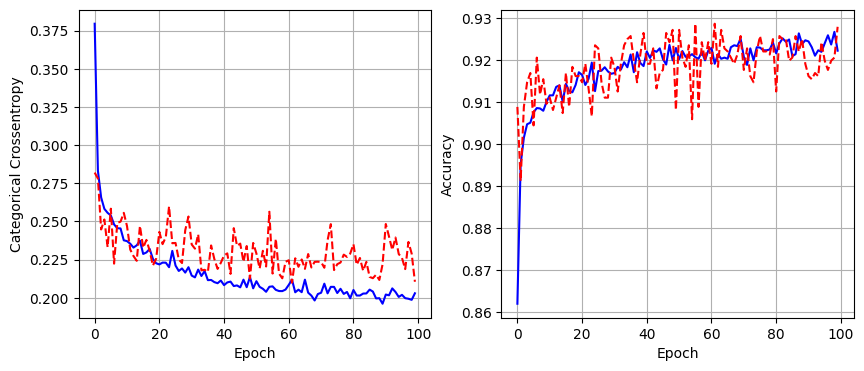


num_nodes1 32, num_nodes2 16, lr 0.01, batch size 64


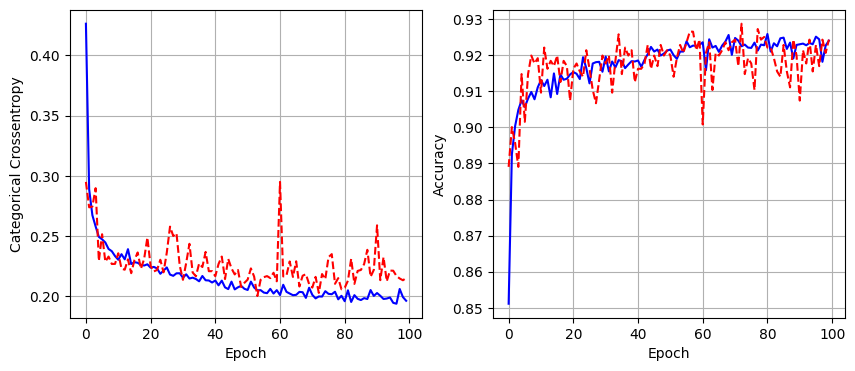


num_nodes1 32, num_nodes2 16, lr 0.01, batch size 128


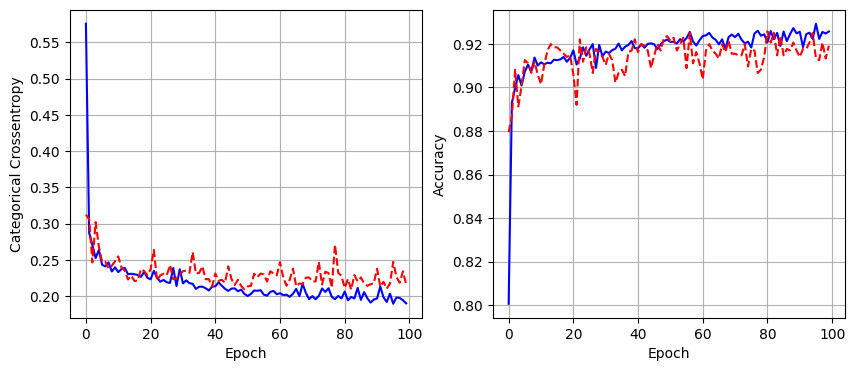


num_nodes1 32, num_nodes2 16, lr 0.005, batch size 32


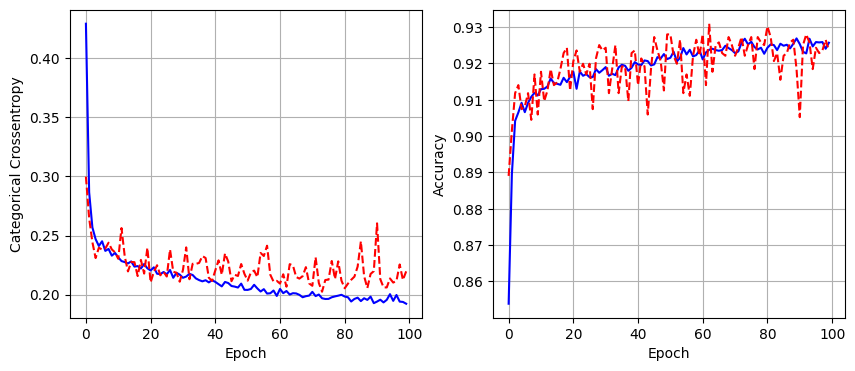


num_nodes1 32, num_nodes2 16, lr 0.005, batch size 64


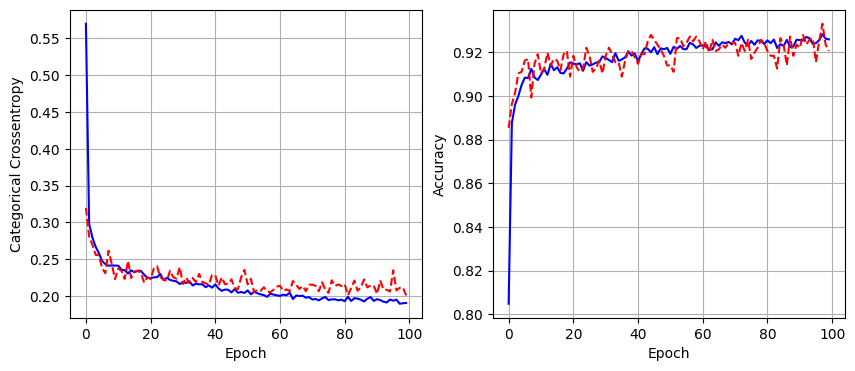


num_nodes1 32, num_nodes2 16, lr 0.005, batch size 128


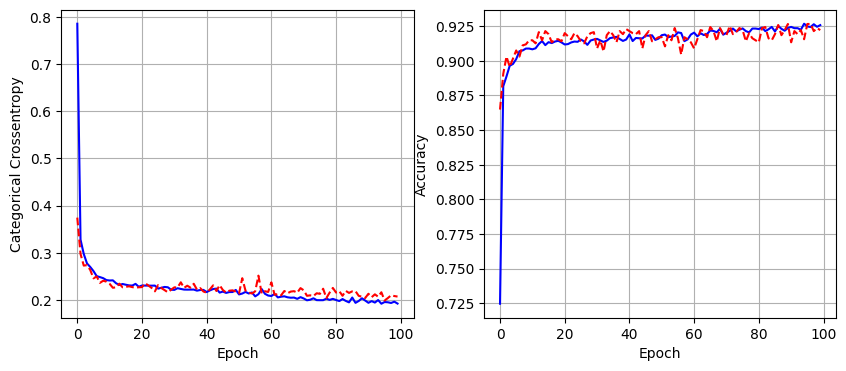


num_nodes1 32, num_nodes2 16, lr 0.001, batch size 32


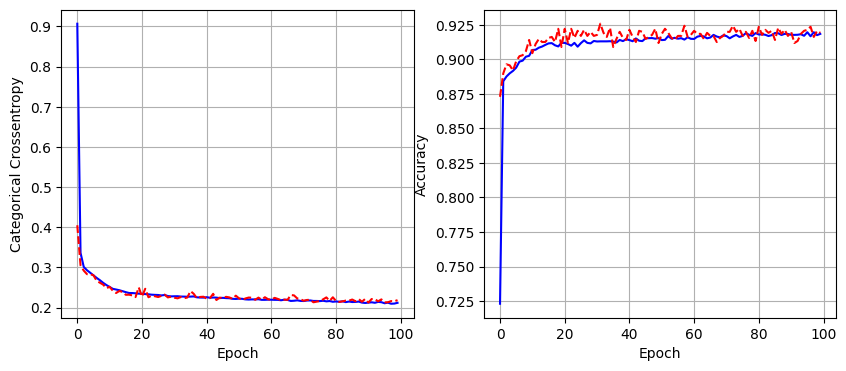


num_nodes1 32, num_nodes2 16, lr 0.001, batch size 64


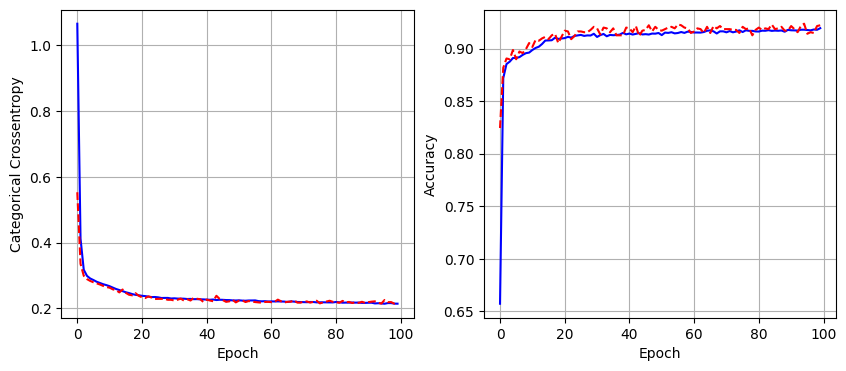


num_nodes1 32, num_nodes2 16, lr 0.001, batch size 128


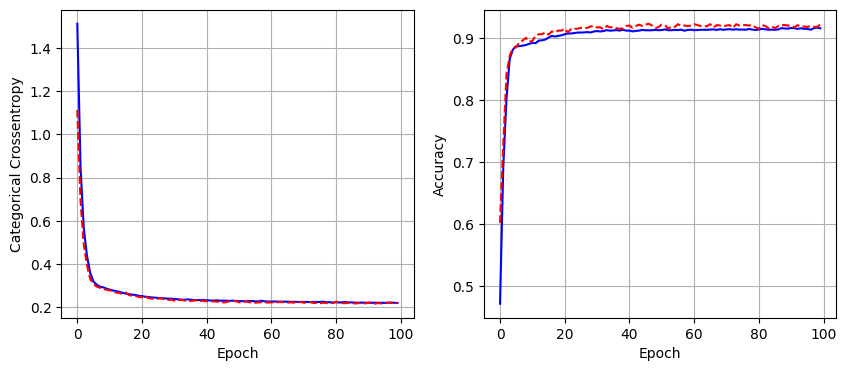


num_nodes1 32, num_nodes2 32, lr 0.01, batch size 32


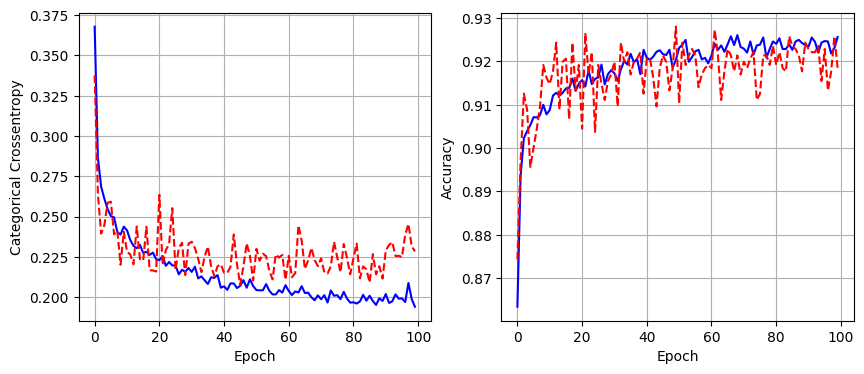


num_nodes1 32, num_nodes2 32, lr 0.01, batch size 64


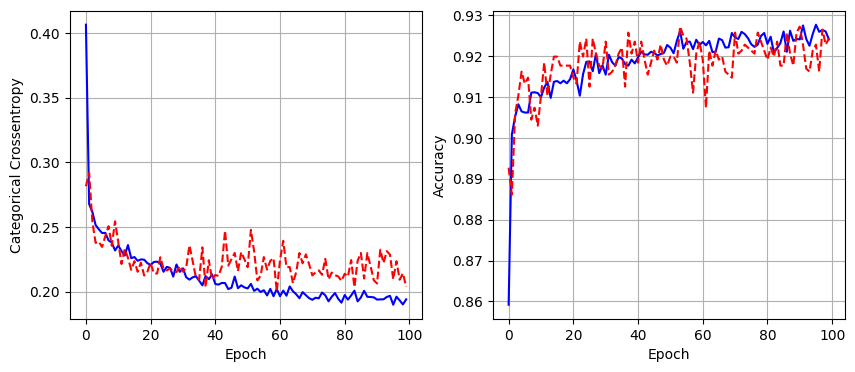


num_nodes1 32, num_nodes2 32, lr 0.01, batch size 128


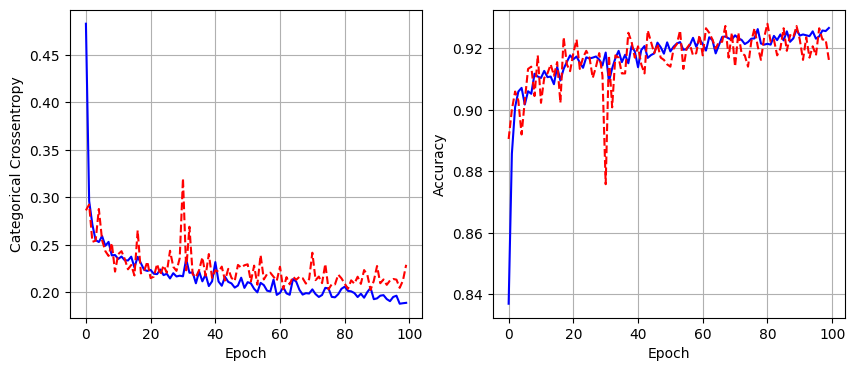


num_nodes1 32, num_nodes2 32, lr 0.005, batch size 32


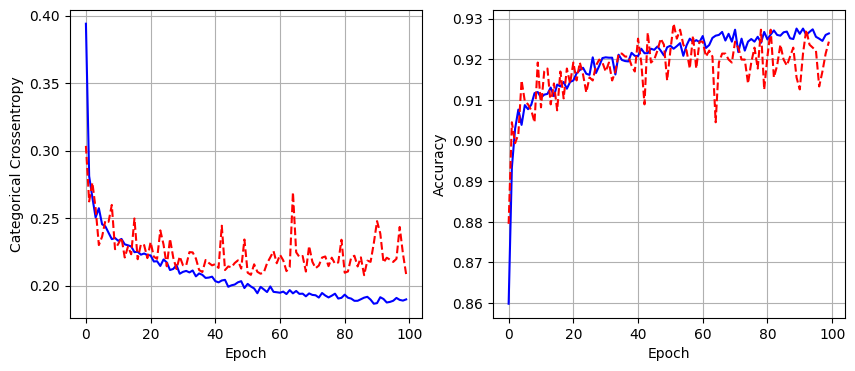


num_nodes1 32, num_nodes2 32, lr 0.005, batch size 64


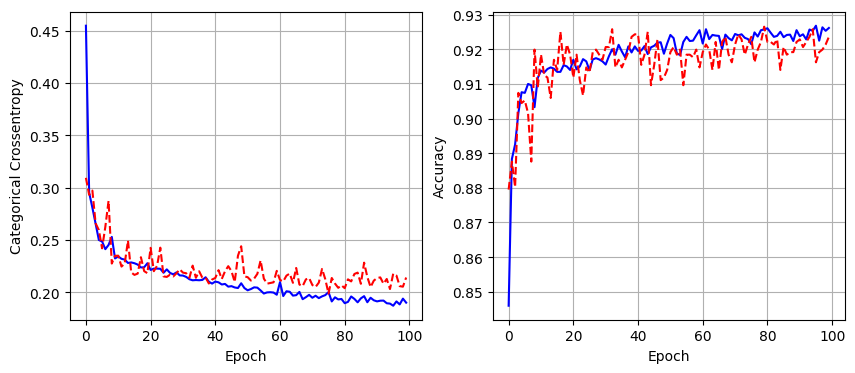


num_nodes1 32, num_nodes2 32, lr 0.005, batch size 128


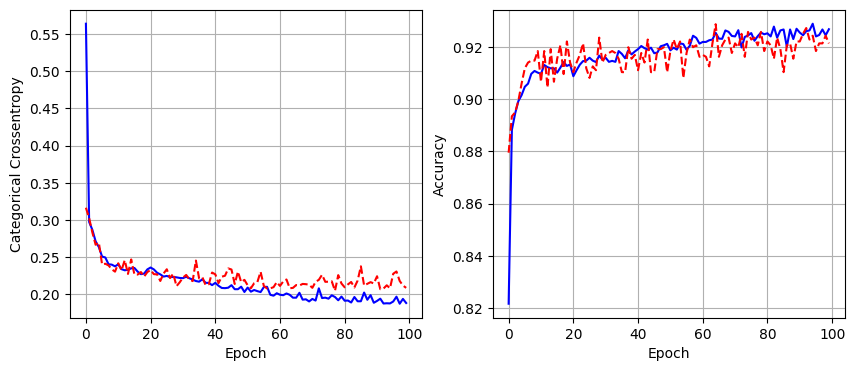


num_nodes1 32, num_nodes2 32, lr 0.001, batch size 32


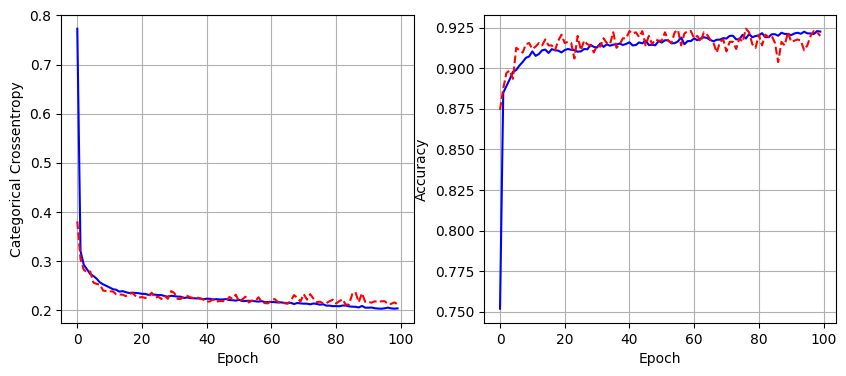


num_nodes1 32, num_nodes2 32, lr 0.001, batch size 64


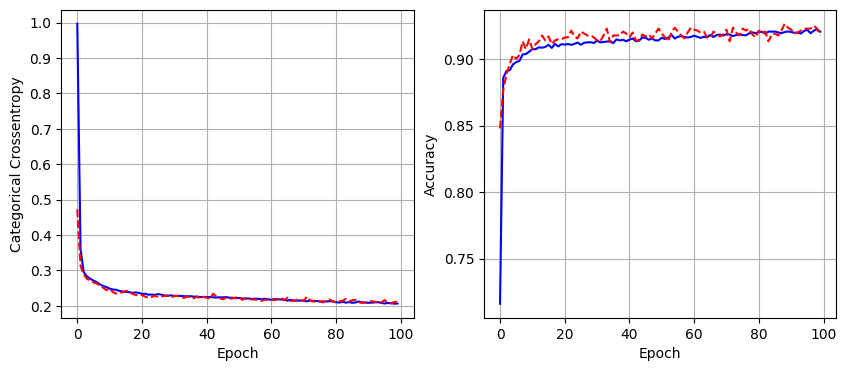


num_nodes1 32, num_nodes2 32, lr 0.001, batch size 128


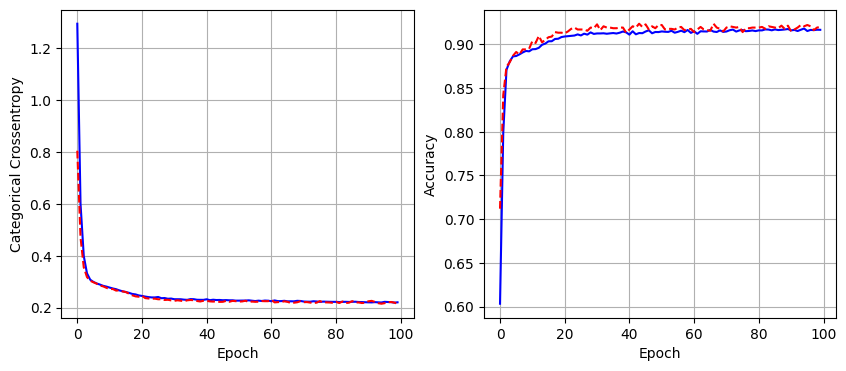

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
best_batch_size = None
num_nodes = [16, 32]

for node1 in num_nodes:
  for node2 in num_nodes:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"num_nodes1 {node1}, num_nodes2 {node2}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train=x_train, 
                                     y_train=nn_y_train,
                                     val_data = (x_val, nn_y_val),
                                     num_nodes1=node1, 
                                     num_nodes2=node2,
                                     lr=lr,
                                     batch_size=batch_size)
        plot_history(history)
        loss = history.history['val_loss'][-1]
        print()
        if loss < least_val_loss:
          least_val_loss = loss
          least_loss_model = model
          best_batch_size = batch_size

In [ ]:
#Least loss model info
print("Learning rate: ", least_loss_model.get_compile_config()['optimizer']['config']['learning_rate'])
print("Batch Size: ", best_batch_size)
least_loss_model.summary()

Learning rate:  0.004999999888241291
Batch Size:  64
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 32)                352       
                                                                 
 dense_67 (Dense)            (None, 16)                528       
                                                                 
 dense_68 (Dense)            (None, 7)                 119       
                                                                 
Total params: 999
Trainable params: 999
Non-trainable params: 0
_________________________________________________________________


###NN Model Testing

In [ ]:
y_pred = least_loss_model.predict(x_test)

43/43 [==============================] - 0s 2ms/step


In [ ]:
y_pred = le.inverse_transform(y_pred.argmax(axis=1))
y_actual = le.inverse_transform(nn_y_test.values.argmax(axis=1))

In [ ]:
print(classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.97      0.88      0.92       140
      BOMBAY       1.00      1.00      1.00        46
        CALI       0.93      0.93      0.93       168
    DERMASON       0.92      0.92      0.92       354
       HOROZ       0.97      0.95      0.96       184
       SEKER       0.93      0.95      0.94       197
        SIRA       0.85      0.88      0.87       273

    accuracy                           0.92      1362
   macro avg       0.94      0.93      0.93      1362
weighted avg       0.92      0.92      0.92      1362

